In [ ]:
#Cargamos las librerias necesarios al analisis de nuestro dataset 
# Import packages
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn Packages
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Sklearn Evaluation Metrics
from sklearn import metrics
from sklearn.metrics import mean_squared_error, precision_score, confusion_matrix, accuracy_score

In [ ]:
#Conectamos nuestro entorno de computación con el drive donde se encontra nuestro dataset 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Leemos nuestro dataset a partir del fichero csv 
path= "/content/drive/MyDrive/Colab Notebooks/DATOS_COMPLETOS.CSV"
Df = pd.read_csv(path)

In [ ]:
#Configuraos la lectura de nuestro dataset con los parametros de delmitación y convertimos el campo de fecha en tipo date
Df = pd.read_csv(path, delimiter=";", parse_dates=['DateObserved'])
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700626 entries, 0 to 700625
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Id            700626 non-null  int64         
 1   Machine       700626 non-null  object        
 2   DateStr       700626 non-null  object        
 3   DateObserved  700626 non-null  datetime64[ns]
 4   H             700598 non-null  float64       
 5   V             700626 non-null  float64       
 6   C             700619 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 37.4+ MB


In [ ]:
#Contamos el numero de filas
Df.Machine.value_counts()

Batidora    700626
Name: Machine, dtype: int64

In [ ]:
#Guardamos las columna que nos interesan y indexamos nuestro dataset
batidora = Df
cols = ['Id','DateStr','Machine']
batidora.drop(cols, axis=1, inplace=True) 
batidora = batidora.sort_values('DateObserved')
batidora = batidora.set_index('DateObserved')
batidora

,H,V,C
DateObserved,,,
2018-09-01 13:39:16,0.18,0.14,0.1
2018-09-01 13:39:46,0.17,0.15,0.1
2018-09-01 13:40:15,0.17,0.17,0.1
2018-09-01 13:42:56,0.17,0.16,0.1
2018-09-01 13:43:26,0.17,0.19,0.1
...,...,...,...
2019-04-30 12:28:48,0.22,0.21,0.1
2019-04-30 12:29:16,0.25,0.23,0.1
2019-04-30 12:29:45,0.24,0.22,0.1


In [ ]:
#Comprobamos si hay valores nullos dentro de nuestro dataset en cada columnas
batidora.isnull().sum()

H    28
V     0
C     7
dtype: int64

In [ ]:
#Eliminamos los valores nulos de nuestro dataframe
batidora.dropna(axis=0,inplace=True)
batidora.isnull().sum()

H    0
V    0
C    0
dtype: int64

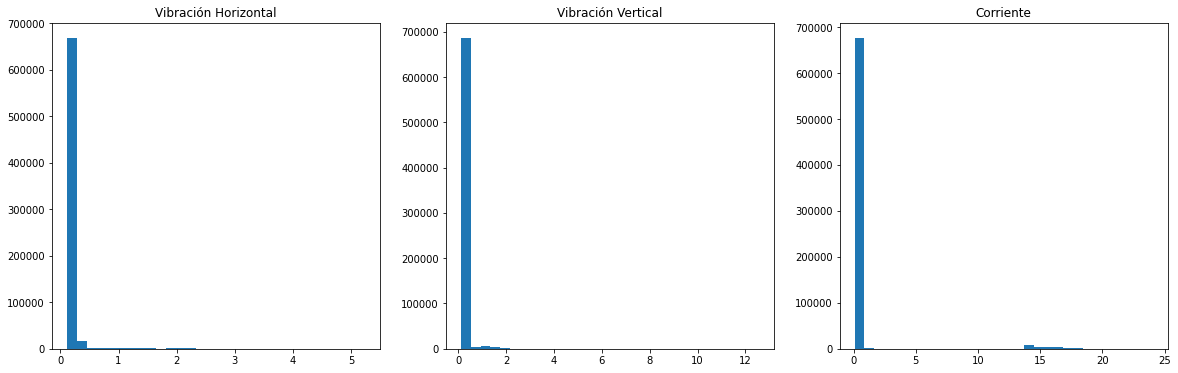

In [ ]:
#Comprobamos la distribucion de los datos en cada una de las columnas
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(20,6))
dfsub = Df

ax[0].hist(dfsub['H'],bins=30)
ax[1].hist(dfsub['V'],bins=30)
ax[2].hist(dfsub['C'],bins=30)


ax[0].title.set_text('Vibración Horizontal')
ax[1].title.set_text('Vibración Vertical')
ax[2].title.set_text('Corriente')

plt.show()

Podemos observar que la distribución de H y V se parecen con un pico entre 0.1 y 0.3 que nos indca que la mayoria de los datos generados son al entorno de estos valores.Mientras que en el caso del corriente esta situado entre 0 y 1.5. Luego indivudualmente observamos en cada una de los campos H V C unas observaciones mas lejanos. En el caso de la vibración vertical podemos ver que hay unos pocas valores que entre 0.5 y 2.3. En el caso de la vibración horizontal observamos estos pocas valores entre 0.3 y 2.1. En fin, en el caso de coriente entre 14 y 18.5. 

In [ ]:
#Observamos las distribucion al nivel de percentiles en cada columna
Df.describe(percentiles=(.1,.25,.5,.75,.9,.95,0.99))

,H,V,C
count,700598.000000,700626.000000,700619.000000
mean,0.226446,0.243882,0.594269
std,0.191817,0.165516,2.673160
min,0.110000,0.090000,0.080000
10%,0.160000,0.160000,0.090000
25%,0.180000,0.180000,0.090000
50%,0.200000,0.220000,0.100000
75%,0.230000,0.260000,0.100000
90%,0.260000,0.310000,0.100000
95%,0.280000,0.360000,0.110000


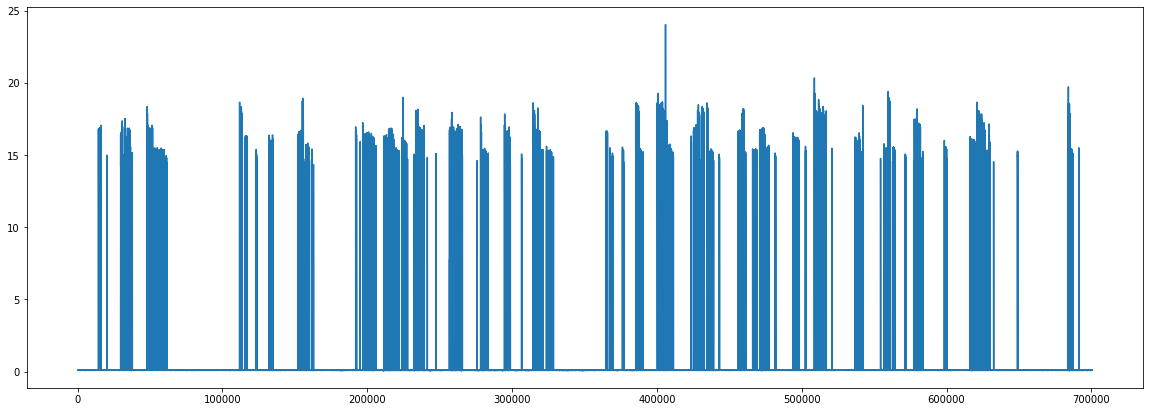

In [ ]:
#Ploteamos la distribucion del corriente de la batidora en el tiempo 
df=batidora
x = Df.index
y = Df.C

plt.figure(figsize=(20,7))
plt.plot(x,y)
plt.show()

Aqui tenemos un grafico que nos permite analizar la distribución del corriente en el tiempo.Podemos observas varios picos con periodos de nulos que pueden ser considerado como momento a donde no corre el corriente o momentos de pausa. 

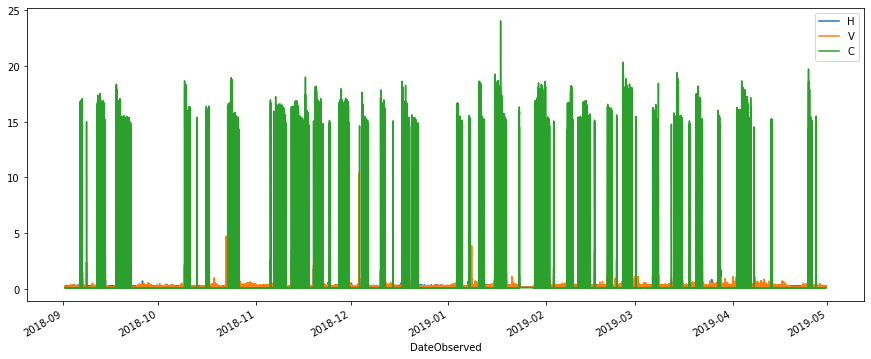

In [ ]:
#ploteamos la distribucion de las variables de nuestro dataset en el tiempo
batidora.plot(figsize=(15,6))
plt.show()

En este grafico analizamos la reparticion de cada variable es decir la vibracion vertical en naranja, la vibracion horizontal en azul y el corriente en verde. Como lo hemos visto antes observamos momentos de pausa en el corriente a lo largo del tiempo. Pero con este grafico solo no podemos analizar el comportamiento de las dos otras variables que son la vibración vertical y horizontal porque cogen valores bastante pequeñas comparado al corriente. 

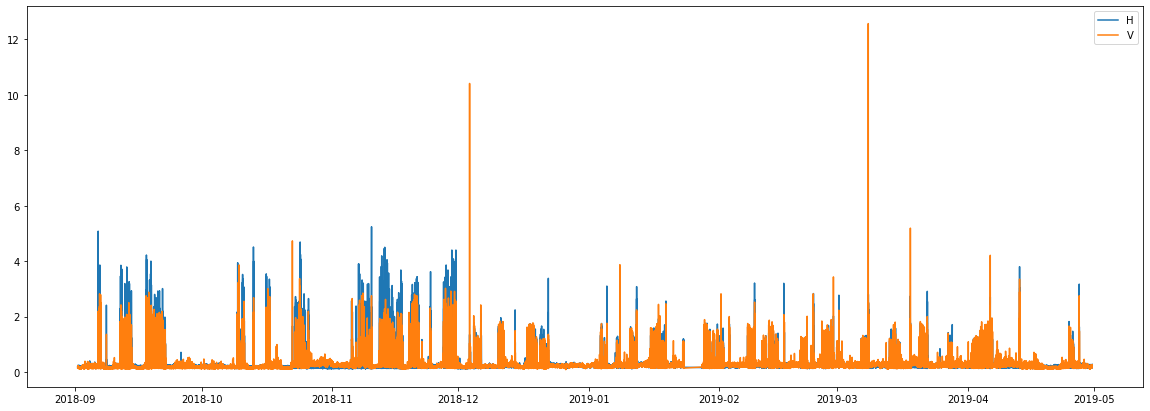

In [ ]:
#Ploteamos los dos tipos de vibración de la batidora en el tiempo
fig,ax = plt.subplots(figsize=(20,7))
Df = batidora
x = Df.index

ax.plot(x,df['H'],label="H")
ax.plot(x,df['V'],label="V")
ax.legend()
plt.show()

En este grafico nos centramos mas en la variables de vibracion horizontal y vibracion vertical. Podemos observar que la distribucion de los dos tipos de vibracion se parecen mucho aún que en la mayoria de los tiempos de utilizacion de la batidora hay mas horizontal que vertical excepto en algunos puntos. 

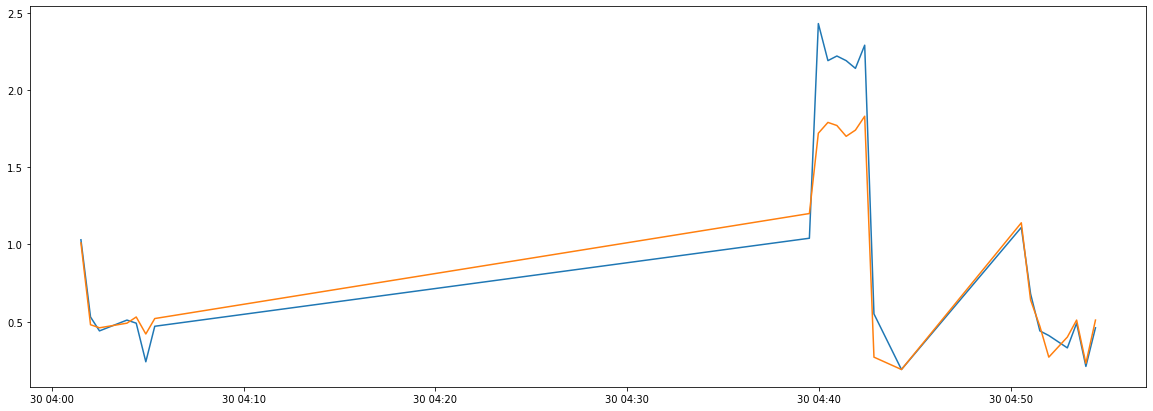

In [ ]:
#Ploteamos otra vez los dos tipos de vibracion de nuestro dataset pero esta vez dentro en de un periodo definido
df7 = Df.loc['2018-11-30 04:00':'2018-11-30 06:00']

fig,ax= plt.subplots(figsize=(20,7))
x=df7.index
ax.plot(x,df7['H'])
ax.plot(x,df7['V'])
#ax.plots(x,df7['C'])
plt.show()

En este grafico podemos analizar la evolución de los valores de las vibraciones vertical y horizontal de la batidora en un tiempo defino , aqui del 30 de noviembre 2018 a las 4 hasta las 6. Observamos que como hemos dicho durante el tiempo de subida de intensidad de la batidora, hay mas vibracones vertical que de vibracion horizontal pero que el lo momentos de intensidad maximales de la batidora hay mas vibraciones horizontales. 

In [ ]:
#Observamos la distribucion de los valores del corriente de la batidora en los differentes percentiles.
Df.C.describe(percentiles=(.1,.25,.5,.75,.9,.95,0.99))


count    700591.000000
mean          0.594289
std           2.673212
min           0.080000
10%           0.090000
25%           0.090000
50%           0.100000
75%           0.100000
90%           0.100000
95%           0.110000
99%          15.620000
max          24.050000
Name: C, dtype: float64

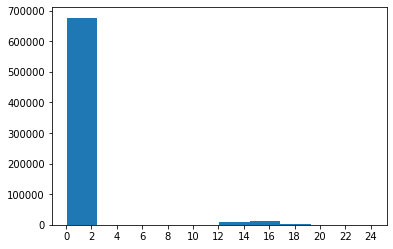

In [ ]:
#Observamos la distribución del corriente configurando el eje x de 2 en 2
# Y dentro de un rango de 0 hasta 25. Asi se puede observar mejor la distribucion 
plt.hist(Df.C)#,bins=50)
plt.xticks(np.arange(25, step=2))
plt.show()

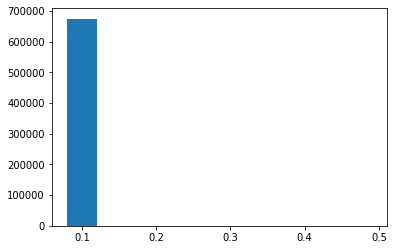

In [ ]:
#Observamos la distribucion de los valores de corriente de la batiodora menor de 0.5
plt.hist(Df[Df.C<.5]['C'])
plt.show()

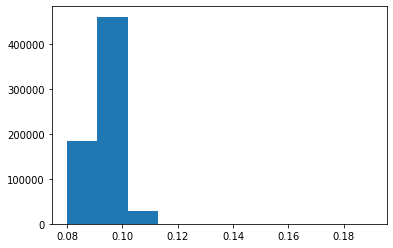

In [ ]:
#Observamos la distribucion de los valores de corriente de la batiodora menor de 0.2
plt.hist(Df[Df.C<.2]['C'])
plt.show()

In [ ]:
#Contamos el frequencia de las valores que pueden tomar la variable corriente
Df.C.value_counts()

0.10     461652
0.09     183551
0.11      29516
14.28       627
14.30       615
          ...  
3.67          1
18.84         1
3.59          1
7.06          1
8.77          1
Name: C, Length: 1556, dtype: int64

In [ ]:
#Observamos donde se encuentran la mayoria de las observaciones del corriente de la batidora
perc = Df.C.value_counts().max()/len(Df)*100
print("Un  {:.2f}% de los valores de C son 0.1".format(perc))

Un  65.89% de los valores de C son 0.1


Parece que durante la gran parte del tiempo la corriente oscilla entre 0.8 y  0.11 habiendo un gran salto entre este rango y el resto de los valores. Dicho rango debe corresponderse con el tiempo en el que la maquina esta apagada, asi que podemos deshacernos de estos datos porque no nos son releventes. 


In [ ]:
#Definemos nuestro nuevo dataframe a partir de los datos del antiguo dataframe que tienen valores de corriente superior a 0.11. 
Df = Df[Df.C>0.11]
Df

,H,V,C
DateObserved,,,
2018-09-06 10:21:25,0.16,0.15,0.12
2018-09-06 10:37:01,5.08,2.18,16.84
2018-09-06 10:37:31,1.93,1.90,16.17
2018-09-06 10:38:01,1.94,1.83,16.18
2018-09-06 10:38:30,1.95,1.77,16.21
...,...,...,...
2019-04-27 11:18:33,0.79,0.85,14.70
2019-04-27 11:19:03,0.80,0.90,14.64
2019-04-27 11:19:31,0.55,0.77,14.48


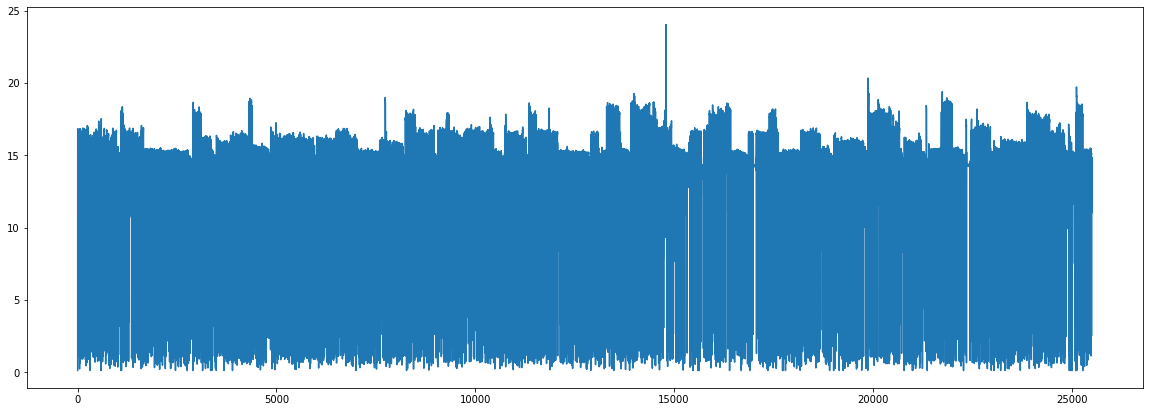

In [ ]:
#ploteamos los datos de tal manera que el eje x sea defindo en el rango de del tamaño del dataframe y que el eje y sea los valores del corriente
x = range(len(Df))
y = Df.C

plt.figure(figsize=(20,7))
plt.plot(x,y)
plt.show()

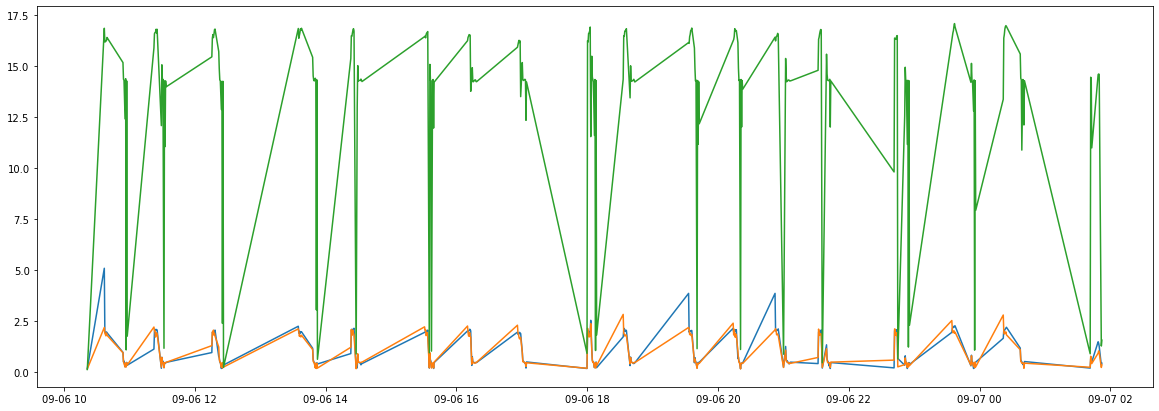

In [ ]:
#Creemos un subset definido a partir de una rango de tiempo elegido y lo ploteamos 
Dfsub = Df.loc["2018-9-6" : "2018-9-7 02"]
fig,ax = plt.subplots(figsize=(20,7))
x = Dfsub.index
ax.plot(x,Dfsub['H'])
ax.plot(x,Dfsub['V'])
ax.plot(x,Dfsub['C'])
plt.show()


Este grafico nos permite confirmas nuestras hypothesis:
-Periodos de pausa de la batidora (low level corriente)
-Vibracion horizontales mas fuerte en tiempo de uso intensivo 
-Vibracion vertical mas fuerte en tiempo de subida de intensidad 

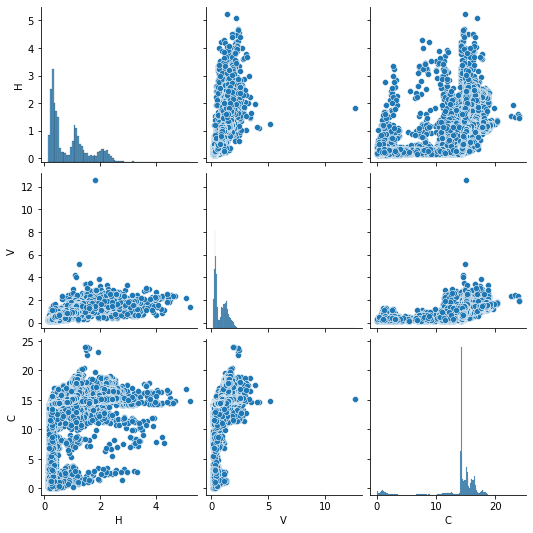

In [ ]:
#Creacion de pairplots que nos permite ver las correlaciones entre cada variables
sns.pairplot(Df)
plt.show()

Visualmente vemos como H y C muestran una relacion apreciable , pero V si muestra alguna relacion lineal tanto con H como con C. 
Con .corr() podemos ver la correlacion entre las variables. 
En que Grado estan relacionadas linealmente: 

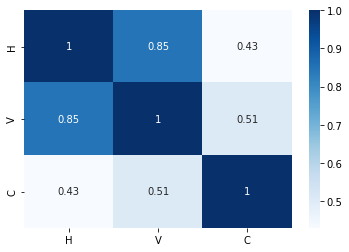

In [ ]:
#Creamos una matriz de correlacion con un heatmap
sns.heatmap(Df.corr(), annot=True, cmap='Blues')

Usando el metodo OLS tambien podemos estudiar la relacion entre las variables. Si por ejemplo nos fijamos en el p-valor(P>|t|), sabemos que si es muy cercano a 0 hay una alta probabildad de que ambas variables estan relacionadas. 

In [ ]:
#Definemos nuestro modelo de regression del corriente sobre las dos tipos vibración y sacamos la estadistica 
import statsmodels.api as sm 
slr_models = sm.OLS(Df['C'], Df[['H','V']])
slr_reg = slr_models.fit()

slr_reg.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      C   R-squared (uncentered):                   0.782
Model:                            OLS   Adj. R-squared (uncentered):              0.782
Method:                 Least Squares   F-statistic:                          4.584e+04
Date:                Fri, 25 Mar 2022   Prob (F-statistic):                        0.00
Time:                        11:49:19   Log-Likelihood:                         -84721.
No. Observations:               25521   AIC:                                  1.694e+05
Df Residuals:                   25519   BIC:                                  1.695e+05
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
H             -0.3664      0.113     -3.248      0.001      -0.587      -0.145
V             13.1216      0.130    100.959      0.000      12.867      13.376
==============================================================================
Omnibus:                    10035.333   Durbin-Watson:                   0.619
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           316915.740
Skew:                          -1.264   Prob(JB):                         0.00
Kurtosis:                      20.077   Cond. No.                         6.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Los resultados del analisis de regression nos indican un R^2 ajustado de 0.79 lo que nos dice que los dos tipos de estan mur relacionados con el corriente. Es decir que la varianza de las vibraciones estan a 80% explicada por el corriente. 

In [ ]:
#Definemos nuestro modelo de regression del corriente sobre las dos tipos vibración y sacamos la estadistica
slr_models = sm.OLS(Df['C'], Df['V'])
slr_reg = slr_models.fit()

slr_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      C   R-squared (uncentered):                   0.782
Model:                            OLS   Adj. R-squared (uncentered):              0.782
Method:                 Least Squares   F-statistic:                          9.164e+04
Date:                Fri, 25 Mar 2022   Prob (F-statistic):                        0.00
Time:                        11:50:13   Log-Likelihood:                         -84727.
No. Observations:               25521   AIC:                                  1.695e+05
Df Residuals:                   25520   BIC:                                  1.695e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
V             12.7221      0.042    302.725      0.000      12.640      12.805
==============================================================================
Omnibus:                     9376.031   Durbin-Watson:                   0.613
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           249140.343
Skew:                          -1.189   Prob(JB):                         0.00
Kurtosis:                      18.121   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#Escalamos los valores de nuestro dataset con el MinMax Scaler
x = Df.values
from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()
x_Scaled = Scaler.fit_transform(x)

In [ ]:
#obtenemos una vision de nuestros datos escalados 
x_Scaled

array([[0.00587084, 0.00160772, 0.        ],
       [0.96868885, 0.164791  , 0.69870455],
       [0.35225049, 0.14228296, 0.67070623],
       ...,
       [0.08219178, 0.05144695, 0.60008358],
       [0.07632094, 0.0522508 , 0.59924781],
       [0.08023483, 0.04823151, 0.60259089]])

In [ ]:
#Nuestro datos escalados estan composado por 3 columnas y 255521 filas
x_Scaled.shape

(25521, 3)

In [ ]:
#creamos nuestro nuevo dataset a partir de nuestros datos escalados 
dfScaled = pd.DataFrame(x_Scaled, columns=['H','V','C'])
dfScaled.head()

,H,V,C
0,0.005871,0.001608,0.000000
1,0.968689,0.164791,0.698705
2,0.352250,0.142283,0.670706
3,0.354207,0.136656,0.671124
4,0.356164,0.131833,0.672378


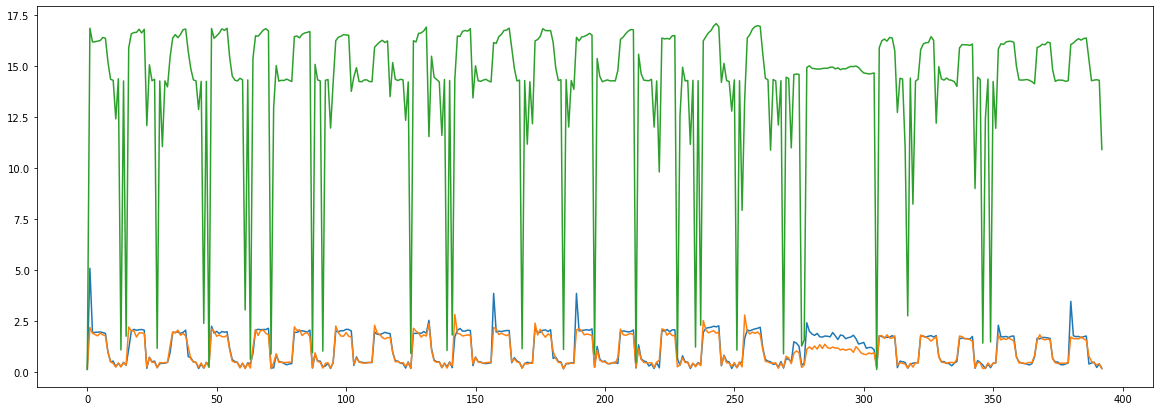

In [ ]:
#Definimos un nuevo subset a partir de la fila 393
Dfsub = Df.iloc[:393]
#ploteamos nuestro subset con un eje x en el mismo rango que el tamaño de nuestro subset 
fig,ax = plt.subplots(figsize=(20,7))
x = range(len(Dfsub))
ax.plot(x, Dfsub['H'])
ax.plot(x, Dfsub['V'])
ax.plot(x, Dfsub['C'])
plt.show()

En este grafico, podemos observar la distribucion de los dos tipos de vibración y y del corriente.Podemos ver que hay una cierta periodicidad en la la distribucion de los datos. Vemos que a partir de los valores entre 90-130, 145-160, 270-310, 320-345 y  352-400 tienen una alta frequencia sin bajar entre el debuto del pico el su fin. 

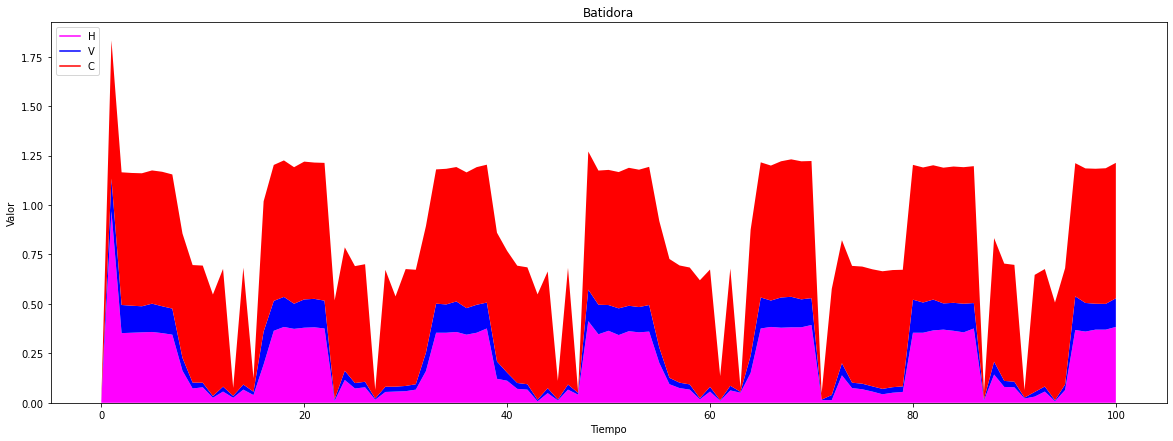

In [ ]:
#Definimos un nuevo subset a partir de la fila 100
Dfsub = dfScaled.loc[:100]
x = Dfsub.index
fig,ax = plt.subplots(figsize=(20,7))
#ploteamos nuestro subset con un eje x en el mismo rango que el tamaño de nuestro subset 
plt.plot([],[],color='magenta',label = 'H')
plt.plot([],[],color='blue',label = 'V')
plt.plot([],[],color='red',label = 'C')

plt.stackplot(x,Dfsub['H'],Dfsub['V'],Dfsub['C'],colors=['magenta','blue','red'])
plt.legend(loc=2)
plt.title('Batidora')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.show()


Con este tipo de grafico podemos observar mejor el comportamiento periodico de la batidora a lo largo del tiempo. Cuando el corriente esta e su intensidd maxima, la vibraciones horizontales como verticales estan siguiendo el ritmo. Las vibrciones vertical con mas potencia que las biraciones horizontales. 

In [ ]:
Dfsub.head()

,H,V,C
0,0.005871,0.001608,0.000000
1,0.968689,0.164791,0.698705
2,0.352250,0.142283,0.670706
3,0.354207,0.136656,0.671124
4,0.356164,0.131833,0.672378


In [ ]:
ax.plot(x,df7['C'])
plt.show()